  <b>Name   : Shinde Saurabh Ashok <br>


<div align="center">
  <h1>Kickstarter Campaign</h1>
</div>

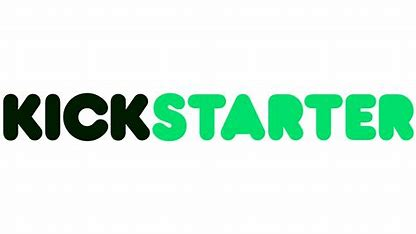

<b>Introduction</b><br>

<b>Kickstarter, the well-known crowdfunding platform (https://www.kickstarter.com), has become a pillar in the development of creative initiatives. It provides a fertile field for aspiring arts entrepreneurs to launch their ideas through fundraising campaigns. While some efforts achieve spectacular success, others struggle to meet their budgetary targets.

In this research, we'll look at a dataset that contains information on over 4000 Kickstarter funding initiatives. Each row contains vital information about a campaign, including the funding goal, pledged amount, project funding status (whether it succeeded or failed), project category (representing the type of art), and whether it received special recognition on the Kickstarter home page through features such as staff picks or spotlights.

Let us go on this fascinating adventure to gather knowledge and understanding.</b><br>

<b>To work on this data analysis we will use numpy,seaborn and matplotlib libraries. </b><br>

In [273]:
import numpy as np
import random as rd
import seaborn as sns
import matplotlib as ml

 
<b>To work on this data analysis we will use data set provided by kickstarters. </b><br>

In [274]:
#load the data in csv file to array.
project_data = np.loadtxt("HW3_kickstarter.csv",
                 delimiter=",", dtype=str)

In [275]:
#Display header column of the data set.

In [276]:
display(project_data[0])

array(['id', 'name', 'goal', 'pledged', 'state', 'country', 'currency',
       'currency_trailing_code', 'staff_pick', 'backers_count',
       'static_usd_rate', 'usd_pledged', 'category', 'spotlight'],
      dtype='<U67')

 <b>descriptive statistics </b><br>
We are going to analyse the statistic of the amount pledged in each project in kickstarters campaign. We will focus on below three objectives.<br>
1. Total number of projects<br>
2. Amount pledged (in U.S. dollars): min, max, mean, median, and standard deviation.<br>
3. Percentage of projects that earned total pledges of at least $2,500.<br>

In [277]:
#taking transpose of array so it will be easy to handle.
project_data2=(project_data.transpose())


In [278]:
#Calculating Total number of projects.
total_projects=len(project_data2[0])-1
print(f'Total number of projects:{total_projects}')

Total number of projects:4184


In [279]:
#Storing amount data in separate array.
i,j=np.where(project_data2=='usd_pledged')
i,j
project_data3=np.delete(project_data2, 0, axis=1)
amount_pledged_usd= project_data3[11][:]
amount_pledged_usd=amount_pledged_usd.astype(float)

In [280]:
#Discriptive analysis of pledged amount in USD.
minimum=min(amount_pledged_usd)
maximum=max(amount_pledged_usd)
mean=np.mean(amount_pledged_usd)
standard_deviation=np.std(amount_pledged_usd)
print(f'Minimum Amount pledged :{minimum:.2f}')
print(f'Maximum Amount pledged :{maximum:.2f}')
print(f'Mean Amount pledged :{mean:.2f}')
print(f'Standard Deviation of Amount pledged :{standard_deviation:.2f}')

Minimum Amount pledged :0.00
Maximum Amount pledged :111111.77
Mean Amount pledged :1242.12
Standard Deviation of Amount pledged :5177.93


In [281]:
#Calculating Percentage of projects that earned total pledges of at least $2,500.
condition=amount_pledged_usd>=2500
percentage= np.sum(condition)*100/len(amount_pledged_usd)
print(f'Percentage of projects that earned total pledges of at least $2,500 is {percentage:.2f}.')

Percentage of projects that earned total pledges of at least $2,500 is 10.59.


 <b>Kickstarter campaign for multiple type of projects, we are going see performance of all diffrent types of project.</b><br>

In [282]:
#Store the project category data in separate array.Load the project categories data.
i,j=np.where(project_data2=='category')
i,j
# Delete the header so it will be easy to work on data
project_data4=np.delete(project_data2, 0, axis=1)
project_categories= project_data4[12][:]
print(project_categories)

['Conceptual Art' 'Conceptual Art' 'Conceptual Art' ... 'Painting'
 'Painting' 'Painting']


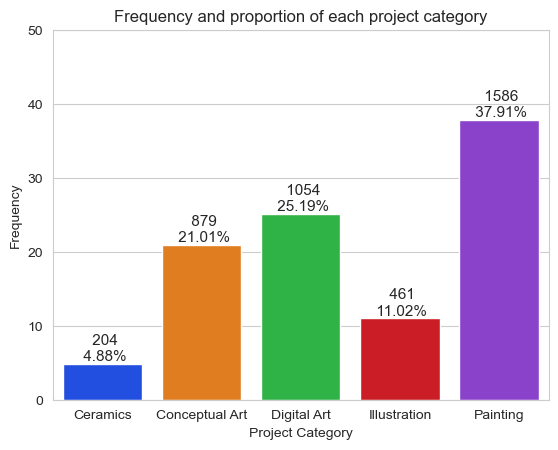

In [283]:
#Storing project category and its count.
value, frequency=np.unique(project_categories,return_counts=True)
values =np.array(value)
total_frequency=frequency.sum()
frequency_percent=np.array(frequency*100/frequency.sum())

#Creating bar chart for the project category.
title=(f'Frequency and proportion of each project category')
sns.set_style('whitegrid')
axes=sns.barplot(x=value, y=frequency*100/frequency.sum(),palette='bright')
axes.set_title(title)
axes.set(xlabel='Project Category',ylabel='Frequency')

#Displaying information on bar chart.
axes.set_ylim (top=50) 
for bar, frequency in zip (axes.patches, frequency): 
    text_x = bar.get_x() + bar.get_width()/2.0 
    text_y = bar.get_height()
    text = f' {frequency:}\n {frequency/total_frequency:.2%}' 
    axes.text(text_x, text_y, text,fontsize=11, ha='center', va='bottom')

<b>Inferences drawn from above visualization:</b><br>
<b>1) Kickstarter is home to a wide range of creative projects. The fact that there are five unique categories ('Ceramics,' 'Conceptual Art,' 'Digital Art,' 'Illustration,' and 'Painting') with varying project counts demonstrates that the platform is home to a diverse range of artistic endeavors seeking support.</b><br>
<b>2) With approximately 38% of total campaigns , the category 'Painting' is the most popular among Kickstarter projects.  This shows that there may be a greater demand or interest to support painting-related projects. <br>


 <b>Kickstarter campaign data contain state on each project where we can get to know about state of project and its success rate.</b><br>

['successful' 'successful' 'successful' ... 'failed' 'failed' 'failed']


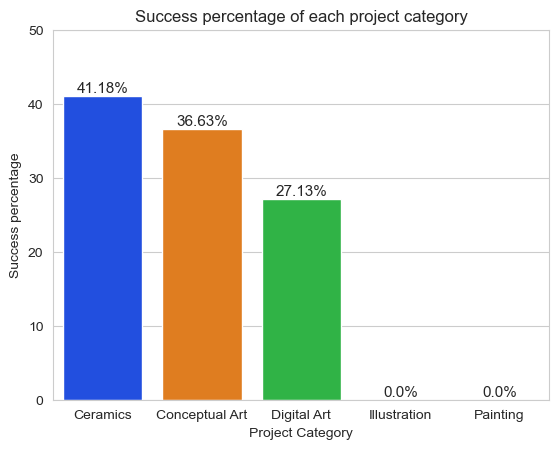

In [284]:
# Load the project states data.
state_row, state_column=np.where(project_data2=='state')

# Delete the header so it will be easy to work on data
project_data5=np.delete(project_data2, 0, axis=1)
project_states= project_data5[state_row[0]][:]

# Display project state data.
print(project_states)
category_state = np.column_stack((project_categories, project_states))
uni_categories = np.unique(category_state[:, 0])
uni_categories

# Calculate succes rate for each category.
success = []
for category in uni_categories:
    # Filter projects of the current category
    each_category = (category_state[:, 0] == category)
    
    # Count total projects of the category
    total_projects = np.sum(each_category)
    
    # Count successful projects of the category
    successful_projects = np.sum(category_state[each_category][:, 1] == 'successful')
    
    # Calculate success percentage
    success_percentage = (successful_projects / total_projects) * 100
    
    # Append to the success_percentages array
    success.append(round(success_percentage,2))
#Create bar chart for success rate for project category.
title=(f'Success percentage of each project category')
sns.set_style('whitegrid')
success_axes=sns.barplot(x=unique_categories, y=success,palette='bright')
success_axes.set_title(title)
success_axes.set(xlabel='Project Category',ylabel='Success percentage')

#Display related information on barchart.
success_axes.set_ylim (top=50) 
for bar, percentage in zip (success_axes.patches, success): 
    text_x = bar.get_x() + bar.get_width()/2.0 
    text_y = bar.get_height()
    text = f'{percentage}%' 
    success_axes.text(text_x, text_y, text,fontsize=11, ha='center', va='bottom')

<b>According to Bar chart we can see that Ceramics is project category which have highest success rate as compared to other.Illustration and Painting both have 0% success rate which is very intresting because painting category have highest number of projects.</b>

In [285]:
# Load the staff pick and spotlight data.
staffpick_row, staffpick_column=np.where(project_data2=='staff_pick')
spotlight_row, spotlight_column=np.where(project_data2=='spotlight')

# Delete the header so it will be easy to work on data
staffpick=np.delete(project_data2, 0, axis=1)
staffpick= staffpick[staffpick_row[0]][:]

# Delete the header so it will be easy to work on data
spotlight=np.delete(project_data2, 0, axis=1)
spotlight= spotlight[spotlight_row[0]][:]

#Merge both arrays.
staffpick_spotlight = np.column_stack((staffpick, spotlight))
print(staffpick_spotlight)


[['FALSE' 'TRUE']
 ['FALSE' 'TRUE']
 ['FALSE' 'TRUE']
 ...
 ['FALSE' 'FALSE']
 ['FALSE' 'FALSE']
 ['FALSE' 'FALSE']]


In [286]:
#convert 'TRUE' and 'FALSE'to boolean value.
staffpick_spotlight = staffpick_spotlight == 'TRUE'

#find the number of True values in each column
true_counts = np.sum(staffpick_spotlight, axis=0)
true_counts
print(f'''Total number of projects identified as staff picks and the total number of 
 identified as spotlight projects are {true_counts[0]} and {true_counts[1]} respectively.''')

Total number of projects identified as staff picks and the total number of 
 identified as spotlight projects are 224 and 692 respectively.


In [287]:
#Store staff-pick and spotlight project data
staff_state = np.column_stack((staffpick, project_states))
spot_state = np.column_stack((spotlight, project_states))
spot_success=0
staff_sucess=0

# Calculate number of succesful project in each category.
for i in range(len(staff_state)):
    if staff_state[i,0]=='TRUE' and staff_state[i,1]=='successful':
        staff_sucess+=1
for i in range(len(spot_state)):
    if spot_state[i,0]=='TRUE' and spot_state[i,1]=='successful':
        spot_success+=1
        
#Display the results.

print(f"Success percentage in staff pick project is: {round(staff_sucess*100/true_counts[0],2)} %")
print(f"Success percentage in  Spotlight project is : {round(spot_success*100/true_counts[1],2)} %")






Success percentage in staff pick project is: 72.77 %
Success percentage in  Spotlight project is : 100.0 %


<b>Inference</b><br>
According to the data the success percentage for Spotlight project is higher than Staff-Picked projects. In fact it is 100%.
Looking at the data the one major observation is goal set for the project. The Average goal amount set for Staff picked project is 8888 dollers and for the Spotlight project it is 3991 dollers. and if we see the overall data for succesful projects the average goal amount is 3991 dollers.


<b>To gain more insight doing analysis and visualization on backer count and goal amount. So it will be easy undestand the data </b><br>

In [288]:
#Storing goal data in separate array.
goal_row,goal_col=np.where(project_data2=='goal')
goal_row,goal_col
goal=np.delete(project_data2, 0, axis=1)
goal_data= goal[goal_row[0]][:]
goal_data=goal_data.astype(float)

#Storing backer and state data in separate array.
backer_row,backer_col=np.where(project_data2=='backers_count')
backer_row,backer_col
backer=np.delete(project_data2, 0, axis=1)
backer_count= backer[backer_row[0]][:]
backer_count=backer_count.astype(float)

#Storing goal and state data in separate array.
goal_state = np.column_stack((goal_data, project_states))
amount_pledged_usd_state = np.column_stack((goal_data, project_states))
backer_state=np.column_stack((backer_count, project_states))
spot_success=0
staff_sucess=0



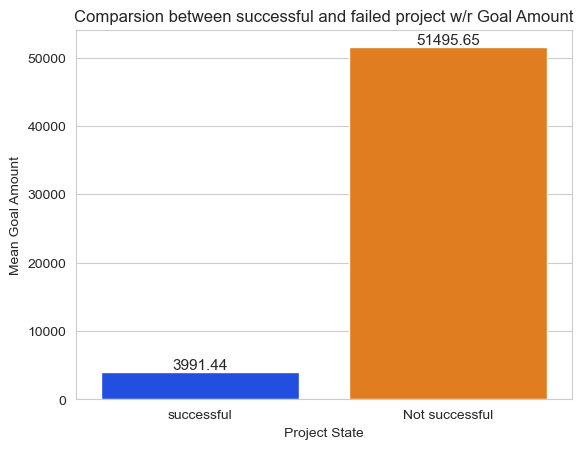

In [289]:
#Filter rows where the state  is 'successful'
successful_goal = goal_state[goal_state[:, 1] == 'successful'][:, 0].astype(float)
not_successful_goal = goal_state[goal_state[:, 1] != 'successful'][:, 0].astype(float)
#Calculate the mean
mean_successful_goal = round(np.mean(successful_goal),2)
mean_not_successful_goal = round(np.mean(not_successful_goal),2)
goal_array=np.array([round(mean_successful,2),mean_not_successful_goal])
state_array=np.array(["successful","Not successful"])

#Create bar chart for omparsion between successful and failed project w/r Goal Amount.
title=(f'Comparsion between successful and failed project w/r Goal Amount')
sns.set_style('whitegrid')
success_axes=sns.barplot(x=state_array, y=goal_array,palette='bright')
success_axes.set_title(title)
success_axes.set(xlabel='Project State',ylabel='Mean Goal Amount')

#Display related information on barchart. 
for bar, amount in zip (success_axes.patches, goal_array): 
    text_x = bar.get_x() + bar.get_width()/2.0 
    text_y = bar.get_height()
    text = f'{amount}' 
    success_axes.text(text_x, text_y, text,fontsize=11, ha='center', va='bottom')

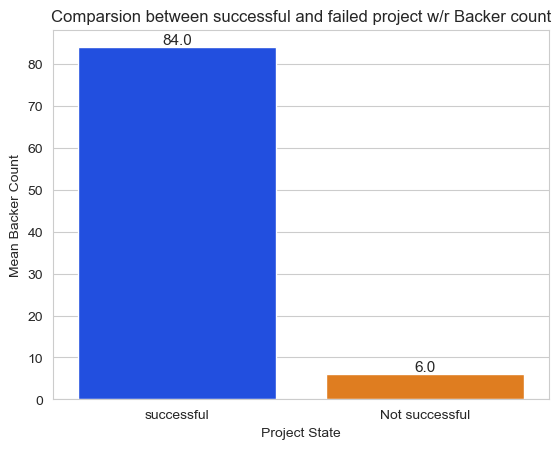

In [290]:
#Filter rows where the state  is 'successful'
successful_backer = backer_state[backer_state[:, 1] == 'successful'][:, 0].astype(float)
not_successful_backer = backer_state[backer_state[:, 1] != 'successful'][:, 0].astype(float)
#Calculate the mean
mean_successful_backer = round(np.mean(successful_backer),0)
mean_not_successful_backer = round(np.mean(not_successful_backer),0)

backer_array=np.array([mean_successful_backer,mean_not_successful_backer])
#Create bar chart for Comparsion between successful and failed project w/r Backer count.
title=(f'Comparsion between successful and failed project w/r Backer count')
sns.set_style('whitegrid')
success_axes=sns.barplot(x=state_array, y=backer_array,palette='bright')
success_axes.set_title(title)
success_axes.set(xlabel='Project State',ylabel='Mean Backer Count')

#Display related information on barchart. 
for bar, backer_count in zip (success_axes.patches, backer_array): 
    text_x = bar.get_x() + bar.get_width()/2.0 
    text_y = bar.get_height()
    text = f'{backer_count}' 
    success_axes.text(text_x, text_y, text,fontsize=11, ha='center', va='bottom')

<b>Conclusion</b><br>
According to above both bar chart we can clearly see the reason between the successful projects and failed projects. The reason for success is having sufficient backers to reach the goal. As per the data we have seen that the average goal amount for succesful project is 3991 doller and average backer count is 84. So this projects easily chase there goal due to sufficient backing.In case of failures, the average goal amount is very high which is 51495 dollers, where avarage backers are just 6.
So, finally to conclude this analysis I can say that kickstater need to work on gain more backers for such projects to increase the success rate.